In [ ]:
from keras.datasets import cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
print('train_images shape', train_images.shape)
print('\ntrain_labels shape', train_labels.shape)
print('\ntrain_labels', train_labels)
print('\ntest_images shape', test_images.shape)
print('\ntest_images size', len(test_labels))
print('\ntest_labels', test_labels)



train_images shape (50000, 32, 32, 3)

train_labels shape (50000, 1)

train_labels [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]

test_images shape (10000, 32, 32, 3)

test_images size 10000

test_labels [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [ ]:
train_images = train_images.reshape((50000, 32, 32,3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, shuffle=True)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)        

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=30, batch_size=256)

Epoch 1/30
157/157 [==============================] - 4s 24ms/step - loss: 1.7713 - accuracy: 0.3473 - val_loss: 1.5289 - val_accuracy: 0.4470
Epoch 2/30
157/157 [==============================] - 4s 22ms/step - loss: 1.3941 - accuracy: 0.4946 - val_loss: 1.3170 - val_accuracy: 0.5260
Epoch 3/30
157/157 [==============================] - 3s 22ms/step - loss: 1.2141 - accuracy: 0.5663 - val_loss: 1.2025 - val_accuracy: 0.5714
Epoch 4/30
157/157 [==============================] - 3s 22ms/step - loss: 1.0876 - accuracy: 0.6166 - val_loss: 1.0760 - val_accuracy: 0.6222
Epoch 5/30
157/157 [==============================] - 3s 22ms/step - loss: 0.9836 - accuracy: 0.6554 - val_loss: 1.0161 - val_accuracy: 0.6387
Epoch 6/30
157/157 [==============================] - 3s 22ms/step - loss: 0.8972 - accuracy: 0.6872 - val_loss: 0.9379 - val_accuracy: 0.6709
Epoch 7/30
157/157 [==============================] - 4s 24ms/step - loss: 0.8296 - accuracy: 0.7122 - val_loss: 0.9135 - val_accuracy: 0.6816

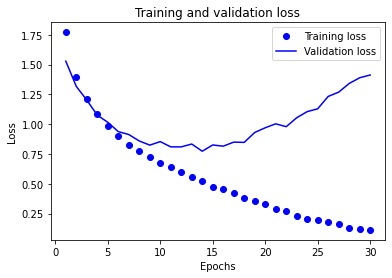

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.4794 - accuracy: 0.7213
1.4793750047683716
0.7213000059127808


# Using data augmentation to solve overfitting problem 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
datagen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

# Vissualizing data augmentation

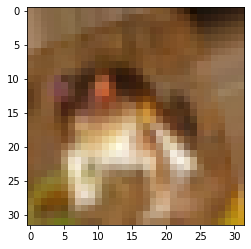

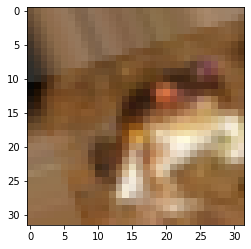

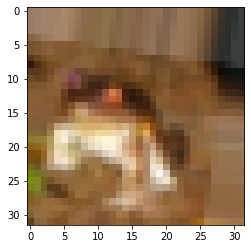

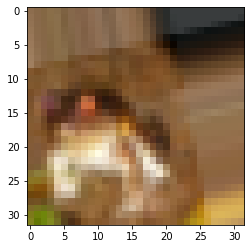

In [ ]:
i = 0

# choose the first image and reshape to (1,32,32,3) 
x = np.expand_dims(train_images[0], 0)
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    #conv_fm = model.predict(batch[0])
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    #save(X, y)
    i += 1
    if i % 4 == 0:#if i < 20000 == 0:
        break

plt.show()

In [ ]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=80), validation_data = datagen.flow(x_val, y_val, batch_size=20), epochs=30, batch_size=256)

Epoch 1/30
500/500 [==============================] - 37s 51ms/step - loss: 1.8598 - accuracy: 0.3192 - val_loss: 1.6394 - val_accuracy: 0.4071
Epoch 2/30
500/500 [==============================] - 25s 49ms/step - loss: 1.5756 - accuracy: 0.4362 - val_loss: 1.4961 - val_accuracy: 0.4659
Epoch 3/30
500/500 [==============================] - 25s 49ms/step - loss: 1.4572 - accuracy: 0.4855 - val_loss: 1.4726 - val_accuracy: 0.4891
Epoch 4/30
500/500 [==============================] - 25s 49ms/step - loss: 1.3573 - accuracy: 0.5263 - val_loss: 1.3787 - val_accuracy: 0.5233
Epoch 5/30
500/500 [==============================] - 26s 51ms/step - loss: 1.2918 - accuracy: 0.5512 - val_loss: 1.2483 - val_accuracy: 0.5636
Epoch 6/30
500/500 [==============================] - 25s 50ms/step - loss: 1.2356 - accuracy: 0.5724 - val_loss: 1.2086 - val_accuracy: 0.5838
Epoch 7/30
500/500 [==============================] - 25s 50ms/step - loss: 1.1863 - accuracy: 0.5932 - val_loss: 1.1656 - val_accuracy:

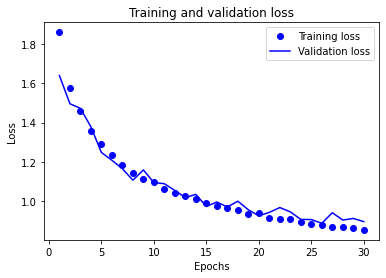

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Tranfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,748,170
Trainable params: 7,112,906
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=80),
                    validation_data = datagen.flow(x_val, y_val, batch_size=20),
                    epochs=30, batch_size=256)

Epoch 1/30
500/500 [==============================] - 28s 55ms/step - loss: 1.7006 - accuracy: 0.4024 - val_loss: 1.5468 - val_accuracy: 0.4578
Epoch 2/30
500/500 [==============================] - 28s 56ms/step - loss: 1.5024 - accuracy: 0.4726 - val_loss: 1.4707 - val_accuracy: 0.4810
Epoch 3/30
500/500 [==============================] - 28s 55ms/step - loss: 1.4483 - accuracy: 0.4930 - val_loss: 1.4289 - val_accuracy: 0.5042
Epoch 4/30
500/500 [==============================] - 28s 56ms/step - loss: 1.4239 - accuracy: 0.5034 - val_loss: 1.4277 - val_accuracy: 0.4990
Epoch 5/30
500/500 [==============================] - 27s 54ms/step - loss: 1.4025 - accuracy: 0.5061 - val_loss: 1.4098 - val_accuracy: 0.5054
Epoch 6/30
500/500 [==============================] - 27s 54ms/step - loss: 1.3900 - accuracy: 0.5139 - val_loss: 1.4003 - val_accuracy: 0.5116
Epoch 7/30
500/500 [==============================] - 27s 54ms/step - loss: 1.3841 - accuracy: 0.5112 - val_loss: 1.4090 - val_accuracy:

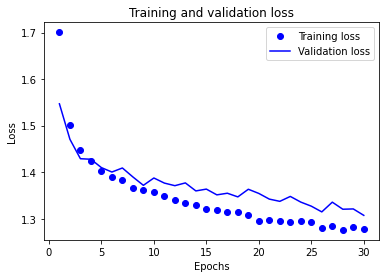

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
# model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               65664     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 7,146,378
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               65664     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 7,146,378
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=80),
                    validation_data = datagen.flow(x_val, y_val, batch_size=20),
                    epochs=30, batch_size=256)

# history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=30, batch_size=256)

Epoch 1/30
500/500 [==============================] - 30s 58ms/step - loss: 1.0677 - accuracy: 0.6717 - val_loss: 0.8883 - val_accuracy: 0.7064
Epoch 2/30
500/500 [==============================] - 28s 56ms/step - loss: 0.9257 - accuracy: 0.6997 - val_loss: 0.8763 - val_accuracy: 0.7077
Epoch 3/30
500/500 [==============================] - 28s 56ms/step - loss: 0.8853 - accuracy: 0.7095 - val_loss: 0.8719 - val_accuracy: 0.7088
Epoch 4/30
500/500 [==============================] - 29s 57ms/step - loss: 0.8600 - accuracy: 0.7175 - val_loss: 0.8855 - val_accuracy: 0.6962
Epoch 5/30
500/500 [==============================] - 28s 56ms/step - loss: 0.8379 - accuracy: 0.7245 - val_loss: 0.8417 - val_accuracy: 0.7208
Epoch 6/30
500/500 [==============================] - 30s 59ms/step - loss: 0.8329 - accuracy: 0.7242 - val_loss: 0.8446 - val_accuracy: 0.7185
Epoch 7/30
500/500 [==============================] - 29s 58ms/step - loss: 0.8232 - accuracy: 0.7252 - val_loss: 0.8293 - val_accuracy:

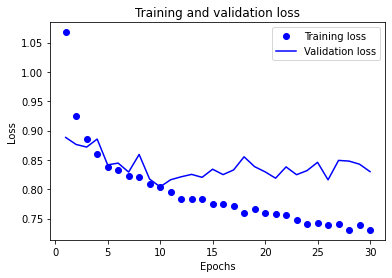

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in conv_base.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=conv_base.input, outputs=layer_outputs)

In [ ]:
img_tensor = np.expand_dims(train_images[0], 0)

activations = activation_model.predict(img_tensor)

In [ ]:
print(scale * display_grid.shape[1], scale * display_grid.shape[0])

16.0 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


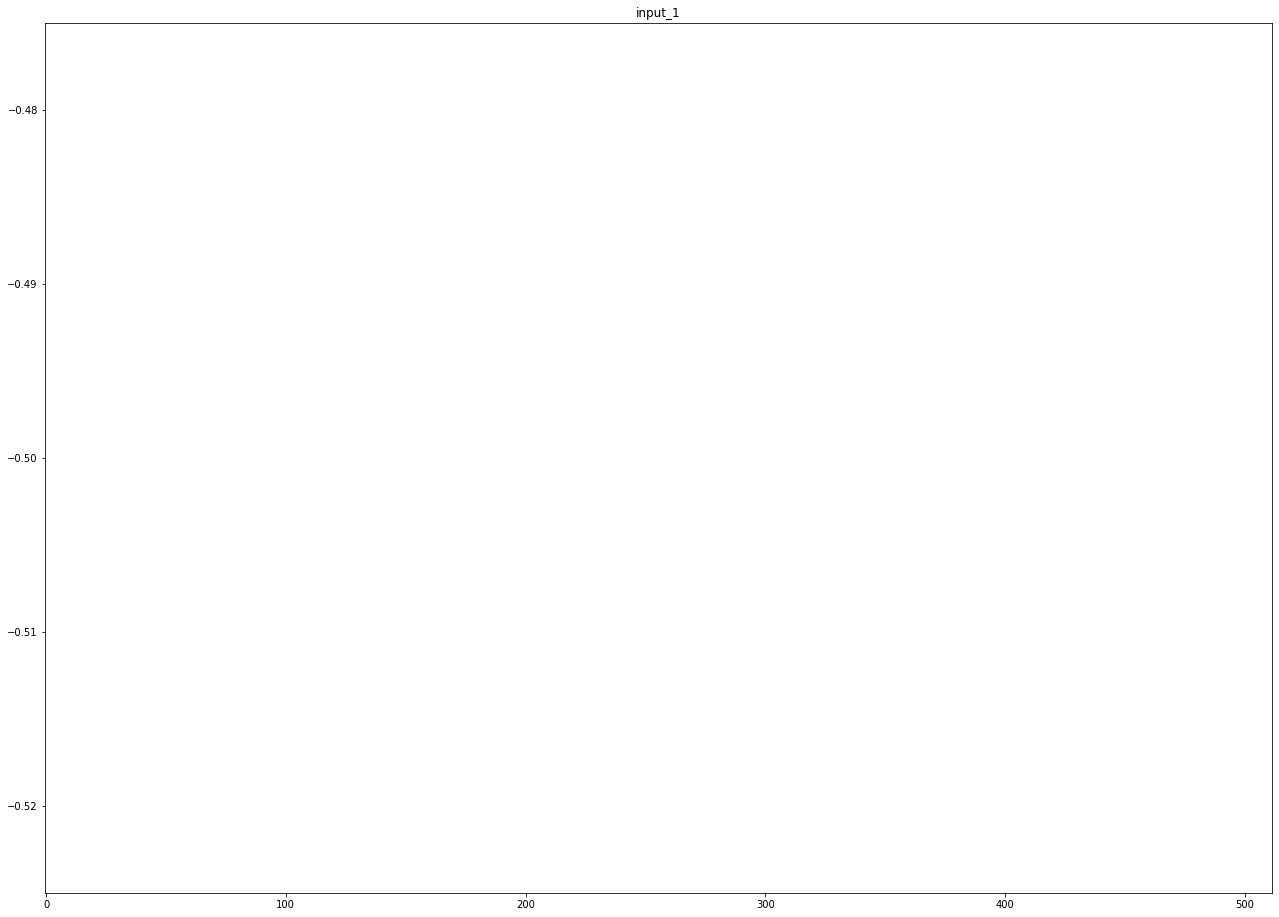

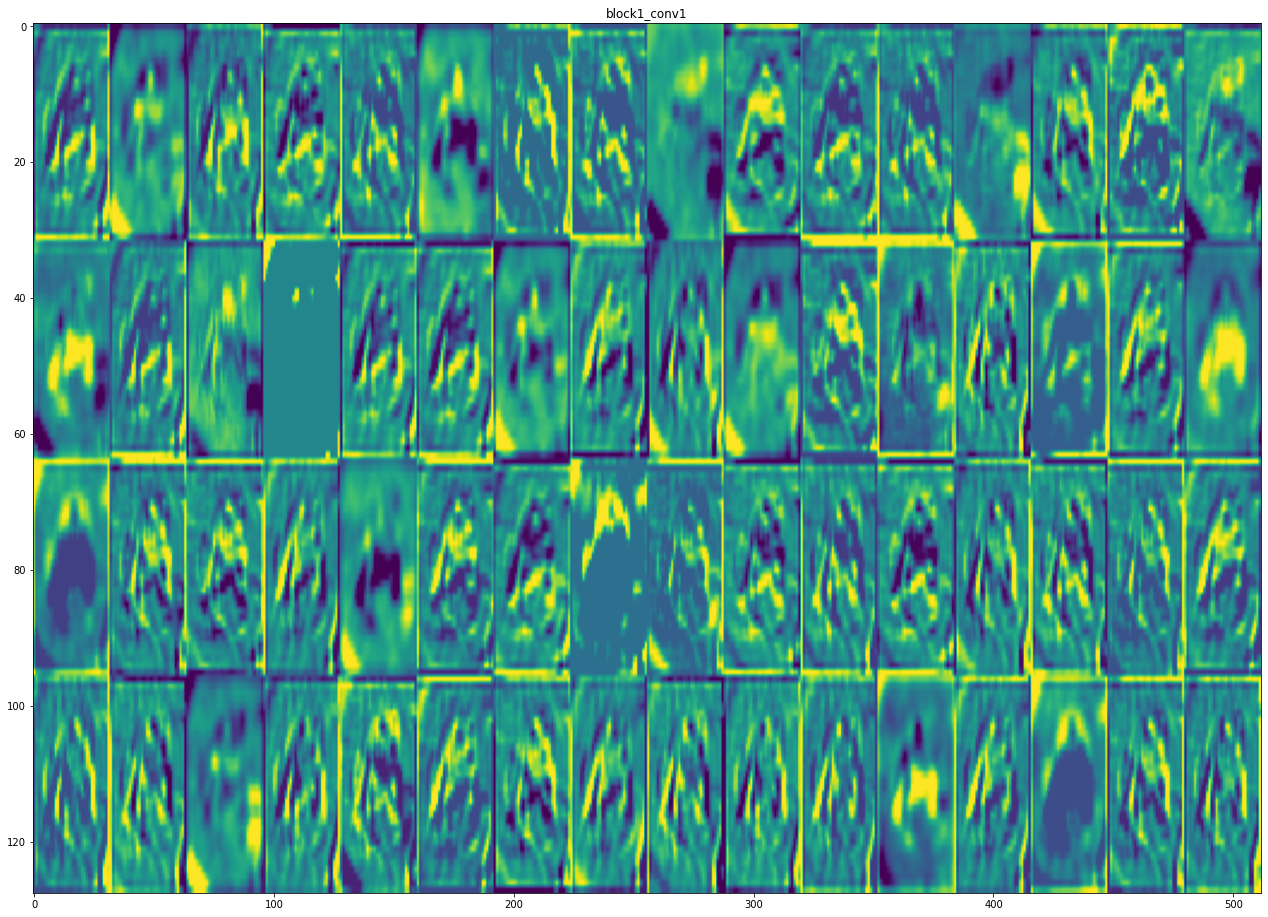

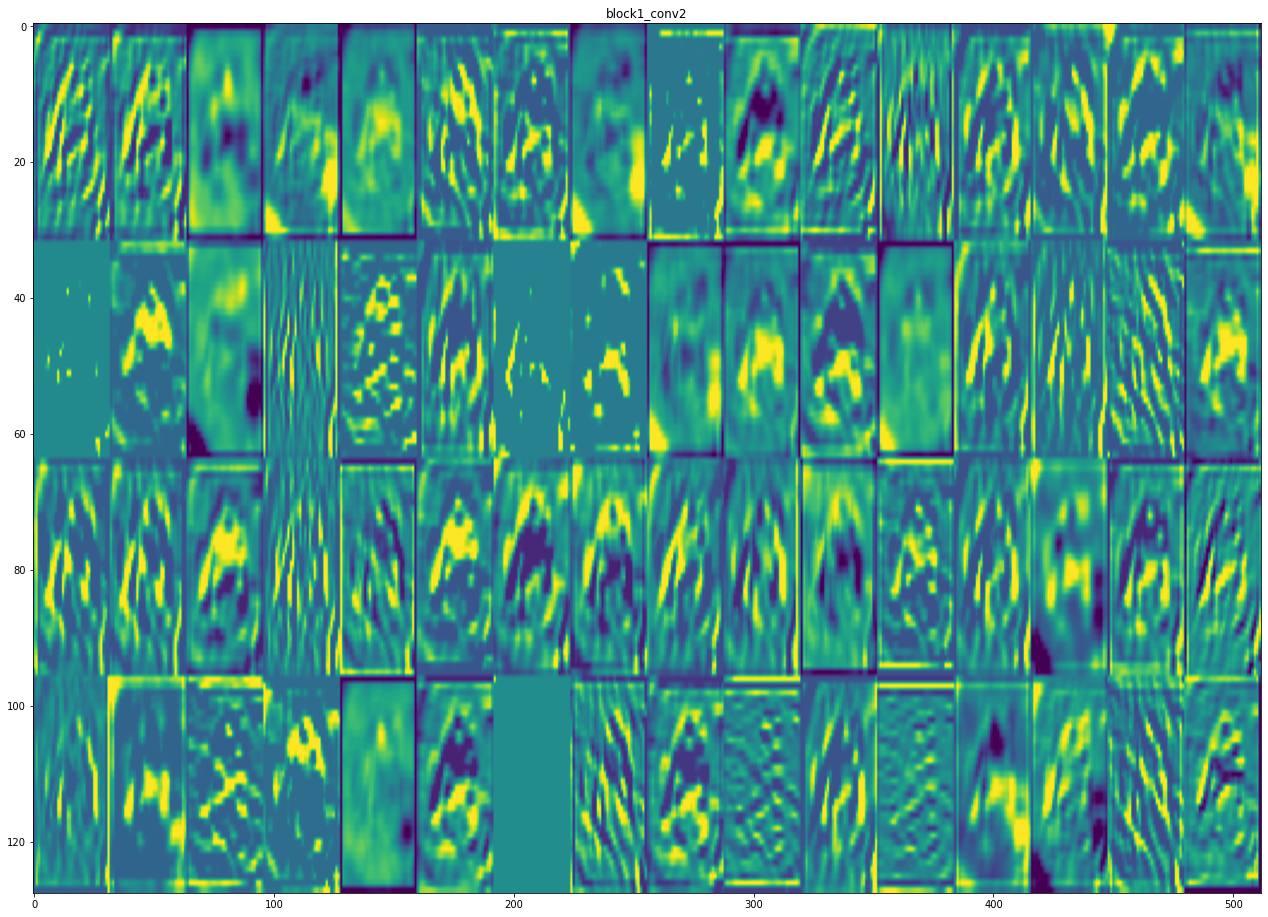

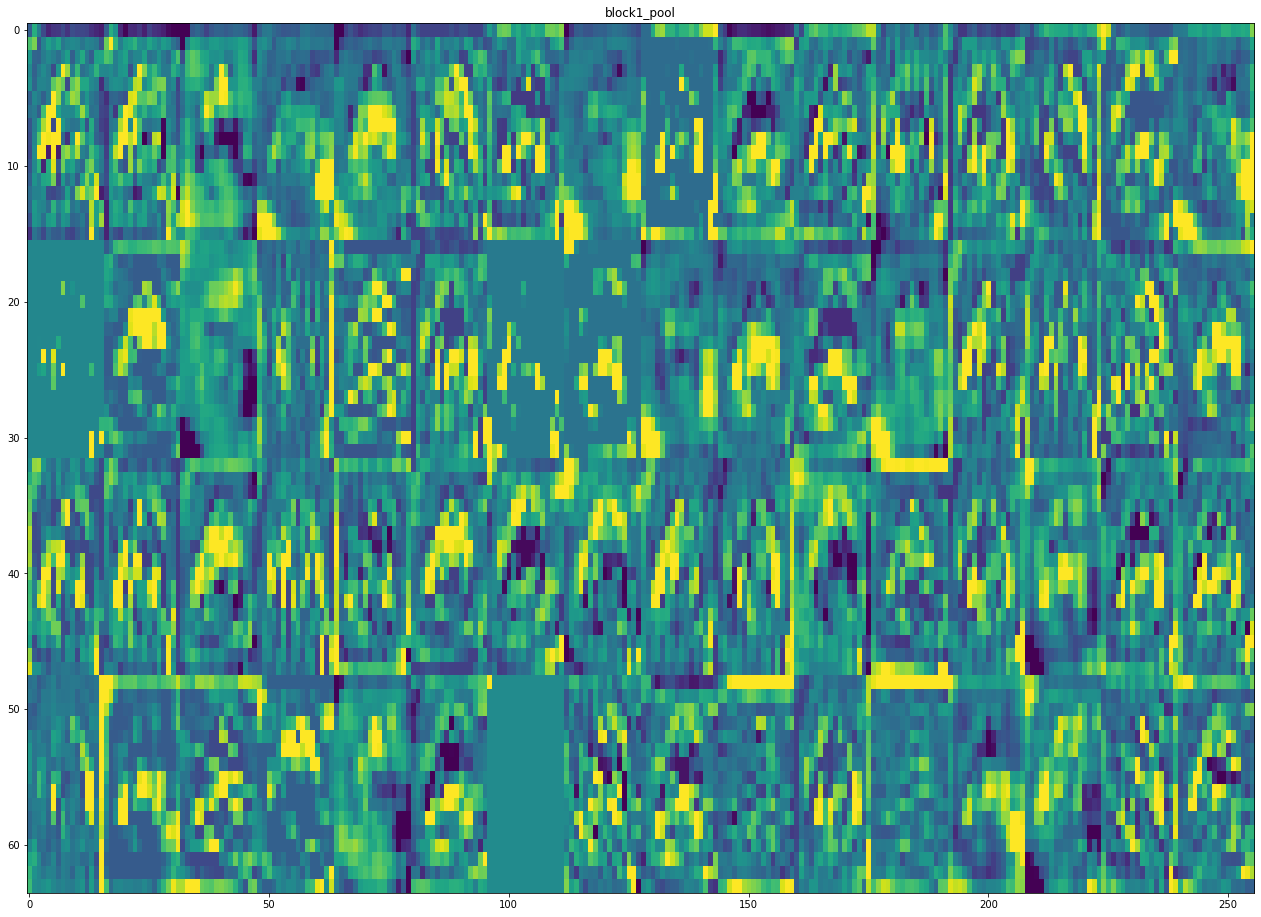

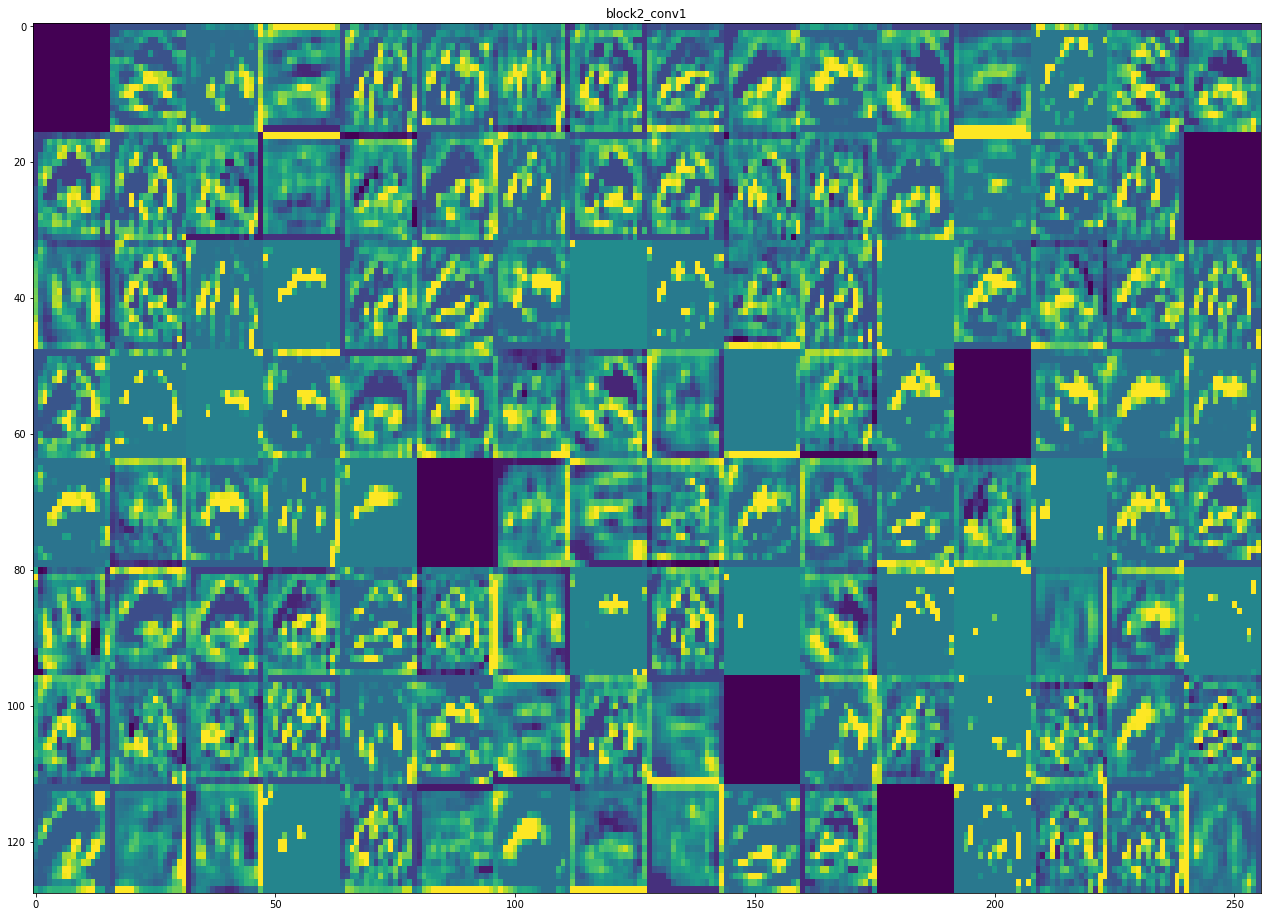

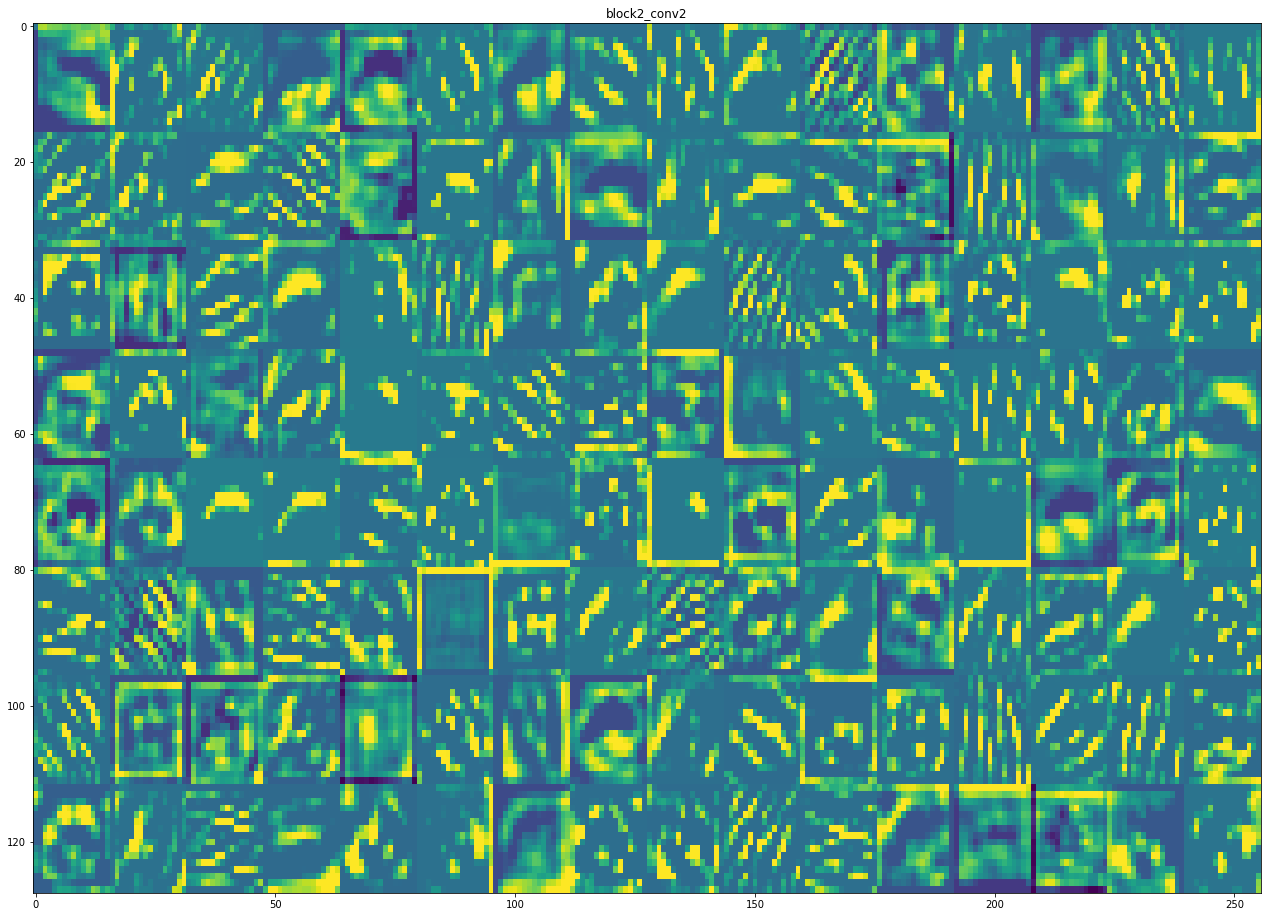

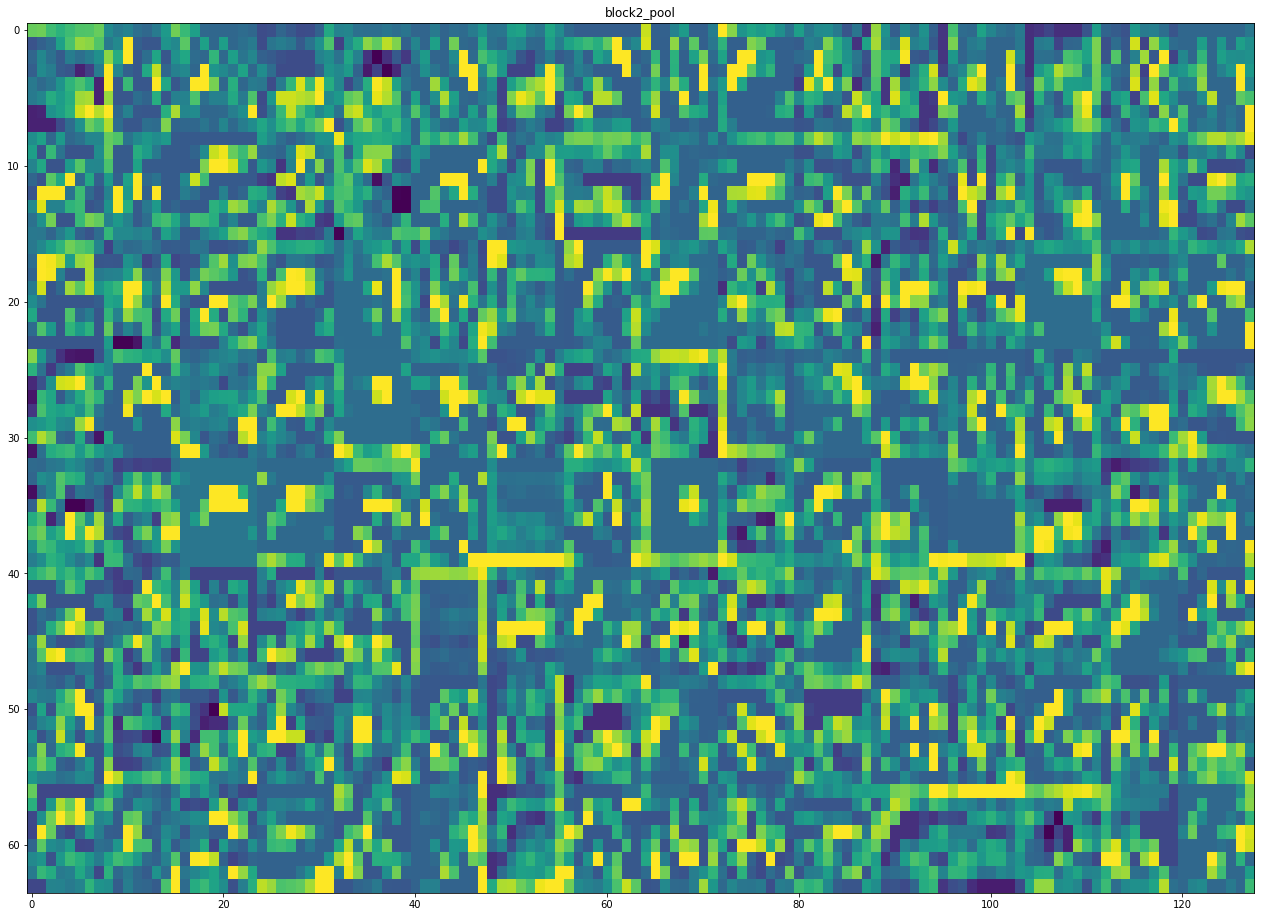

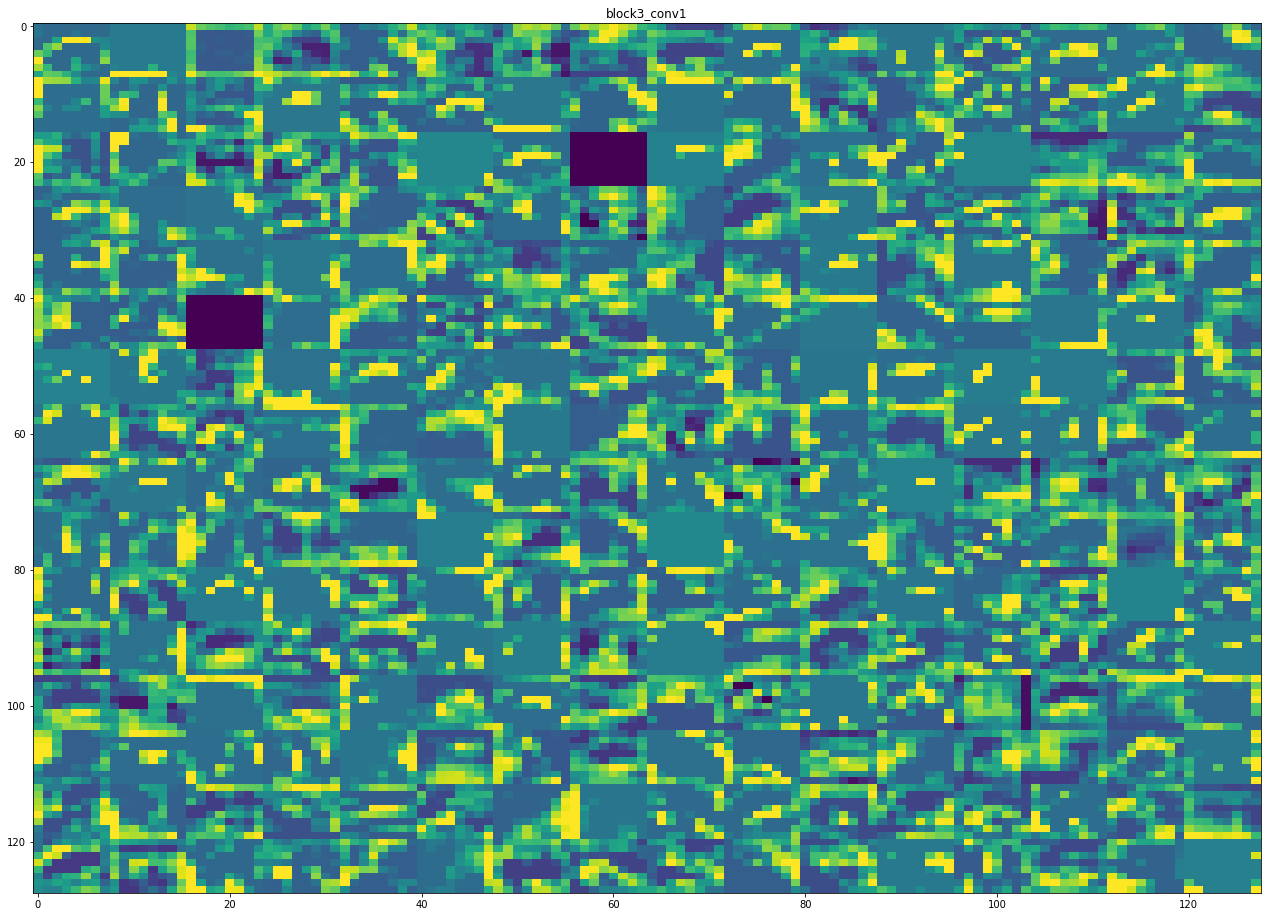

In [ ]:
import tensorflow.keras as keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in conv_base.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(22, 16))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

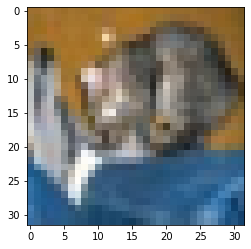

In [ ]:
img = test_images[0]
plt.imshow(np.reshape(img, (32,32,3)))

In [ ]:
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
idx = np.argmax(model.predict(np.reshape(img, (1,32,32,3))))
names[idx]

'cat'